In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib.patches import Ellipse
import matplotlib as mpl
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [2]:
count_dataframe = pd.read_csv('~/Downloads/TF/normRNA-seq.csv', # where to find the data
                              index_col=1) # use the first column to label the rows (the 'index')

#print the first 2 rows of our dataframe
#print(count_dataframe.head(2)) 

In [3]:
print(count_dataframe.head(2)) 

                    Unnamed: 0     control1     control2           A1  \
ENSEMBL                                                                 
ENSMUSG00000000001           1  6515.581237  7045.231421  7783.985861   
ENSMUSG00000000028           2   520.055183   476.470862   311.565769   

                             A2           B1           B2           C1  \
ENSEMBL                                                                  
ENSMUSG00000000001  8030.803154  6887.805839  7387.753669  7248.143150   
ENSMUSG00000000028   387.940448   416.013832   391.892941   212.183647   

                             C2           D1   ...             J2  \
ENSEMBL                                        ...                  
ENSMUSG00000000001  8152.473598  5765.552044   ...    7522.766098   
ENSMUSG00000000028   290.963704   209.669019   ...     816.211333   

                             K1           K2           L1           L2  \
ENSEMBL                                                    

In [4]:
'''
col = count_dataframe.loc[:,"control1":"control2"]
count_dataframe['control_mean'] = col.mean(axis=1)

col = count_dataframe.loc[:,"A1":"A2"]
count_dataframe['A_mean'] = col.mean(axis=1)

col = count_dataframe.loc[:,"B1":"B2"]
count_dataframe['B_mean'] = col.mean(axis=1)

col = count_dataframe.loc[:,"C1":"C2"]
count_dataframe['C_mean'] = col.mean(axis=1)

col = count_dataframe.loc[:,"D1":"D2"]
count_dataframe['D_mean'] = col.mean(axis=1)

col = count_dataframe.loc[:,"E1":"E2"]
count_dataframe['E_mean'] = col.mean(axis=1)

col = count_dataframe.loc[:,"F1":"F2"]
count_dataframe['F_mean'] = col.mean(axis=1)

col = count_dataframe.loc[:,"G1":"G2"]
count_dataframe['G_mean'] = col.mean(axis=1)

col = count_dataframe.loc[:,"H1":"H2"]
count_dataframe['H_mean'] = col.mean(axis=1)

col = count_dataframe.loc[:,"I1":"I2"]
count_dataframe['I_mean'] = col.mean(axis=1)

col = count_dataframe.loc[:,"J1":"J2"]
count_dataframe['J_mean'] = col.mean(axis=1)

col = count_dataframe.loc[:,"K1":"K2"]
count_dataframe['K_mean'] = col.mean(axis=1)

col = count_dataframe.loc[:,"L1":"L2"]
count_dataframe['L_mean'] = col.mean(axis=1)

col = count_dataframe.loc[:,"M1":"M2"]
count_dataframe['M_mean'] = col.mean(axis=1)

col = count_dataframe.loc[:,"iTS1":"iTS2"]
count_dataframe['iTS_mean'] = col.mean(axis=1)
'''

'\ncol = count_dataframe.loc[:,"control1":"control2"]\ncount_dataframe[\'control_mean\'] = col.mean(axis=1)\n\ncol = count_dataframe.loc[:,"A1":"A2"]\ncount_dataframe[\'A_mean\'] = col.mean(axis=1)\n\ncol = count_dataframe.loc[:,"B1":"B2"]\ncount_dataframe[\'B_mean\'] = col.mean(axis=1)\n\ncol = count_dataframe.loc[:,"C1":"C2"]\ncount_dataframe[\'C_mean\'] = col.mean(axis=1)\n\ncol = count_dataframe.loc[:,"D1":"D2"]\ncount_dataframe[\'D_mean\'] = col.mean(axis=1)\n\ncol = count_dataframe.loc[:,"E1":"E2"]\ncount_dataframe[\'E_mean\'] = col.mean(axis=1)\n\ncol = count_dataframe.loc[:,"F1":"F2"]\ncount_dataframe[\'F_mean\'] = col.mean(axis=1)\n\ncol = count_dataframe.loc[:,"G1":"G2"]\ncount_dataframe[\'G_mean\'] = col.mean(axis=1)\n\ncol = count_dataframe.loc[:,"H1":"H2"]\ncount_dataframe[\'H_mean\'] = col.mean(axis=1)\n\ncol = count_dataframe.loc[:,"I1":"I2"]\ncount_dataframe[\'I_mean\'] = col.mean(axis=1)\n\ncol = count_dataframe.loc[:,"J1":"J2"]\ncount_dataframe[\'J_mean\'] = col.mean(

In [5]:
c = ['c' + str(i) + str(j) for i in range(1,16) for j in range(1,3)]
print(c)

['c11', 'c12', 'c21', 'c22', 'c31', 'c32', 'c41', 'c42', 'c51', 'c52', 'c61', 'c62', 'c71', 'c72', 'c81', 'c82', 'c91', 'c92', 'c101', 'c102', 'c111', 'c112', 'c121', 'c122', 'c131', 'c132', 'c141', 'c142', 'c151', 'c152']


In [6]:
count_dataframe.drop(count_dataframe.iloc[:,0:1],inplace = True, axis = 1)
count_dataframe.drop(count_dataframe.iloc[:,30:31],inplace = True, axis = 1)

In [7]:
print(count_dataframe.head(2)) 

                       control1     control2           A1           A2  \
ENSEMBL                                                                  
ENSMUSG00000000001  6515.581237  7045.231421  7783.985861  8030.803154   
ENSMUSG00000000028   520.055183   476.470862   311.565769   387.940448   

                             B1           B2           C1           C2  \
ENSEMBL                                                                  
ENSMUSG00000000001  6887.805839  7387.753669  7248.143150  8152.473598   
ENSMUSG00000000028   416.013832   391.892941   212.183647   290.963704   

                             D1           D2     ...                J1  \
ENSEMBL                                          ...                     
ENSMUSG00000000001  5765.552044  5882.318055     ...       5906.416187   
ENSMUSG00000000028   209.669019   177.299626     ...        625.489033   

                             J2           K1           K2           L1  \
ENSEMBL                            

In [8]:
#help(pd.DataFrame.shape)
print(count_dataframe.shape)

(13152, 30)


In [9]:
scaled_data = preprocessing.scale(count_dataframe.T)
#print(scaled_data.sum(axis=0))
#print(scaled_data[0:2,:])
pca = PCA()
pca.fit(scaled_data)
#print(scaled_data.shape)
pca_data = pca.transform(scaled_data)
#print(pca_data.shape)
#print(pca_data)
print(pca)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)


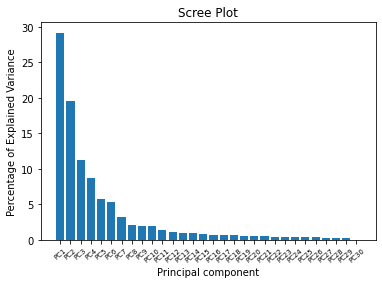

In [10]:
per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)
labels = ['PC'+str(x) for x in range(1,len(per_var)+1)]
plt.bar(x = range(1,len(per_var)+1),height = per_var, tick_label = labels)
plt.xticks(rotation=40,fontsize = 7)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal component')
plt.title('Scree Plot')
plt.show()

In [11]:
pca_df = pd.DataFrame(pca_data,index = c,columns = labels)
#print(pca_df)

In [12]:
state_map = {'control':'dimgray','T1C0':'lightcoral','T1C1':'palegreen','T0C1':'lightskyblue','T0C0':'plum', 'iTS':'orange'}
'''
pca_state_df = pca_df.rename(index={'c11':('control','control'), 'c12':('control','control'),
                                         'c21':('T1C0','Day3'), 'c22':('T1C0','Day3'), 'c31':('T1C1','Day3'), 'c32':('T1C1','Day3'),
                                         'c41':('T1C0','Day6'), 'c42':('T1C0','Day6'), 'c51':('T1C1','Day6'), 'c52':('T1C1','Day6'),
                                         'c61':('T0C1','Day6'),'c62':('T0C1','Day6'),'c71':('T0C0','Day6'),'c72':('T0C0','Day6'),
                                         'c81':('T1C0','Day12'), 'c82':('T1C0','Day12'), 'c91':('T1C1','Day12'),'c92':('T1C1','Day12'),
                                         'c101':('T0C1','Day12'), 'c102':('T0C1','Day12'), 'c111':('T0C0','Day12'), 'c112':('T0C0','Day12'),
                                         'c121':('T1C0','Day12_7'), 'c122':('T1C0','Day12_7'),'c131':('T0C1','Day12_7'),'c132':('T0C1','Day12_7'),
                                         'c141':('T0C0','Day12_7'), 'c142':('T0C0','Day12_7'), 'c151':('iT5','iT5'), 'c152':('iT5','iT5')})
'''
pca_state_df = pd.DataFrame(pca_data,index=pd.MultiIndex.from_tuples([('control','control'), ('control','control'),
                                         ('T1C0','Day3'), ('T1C0','Day3'), ('T1C1','Day3'), ('T1C1','Day3'),
                                         ('T1C0','Day6'), ('T1C0','Day6'), ('T1C1','Day6'), ('T1C1','Day6'),
                                         ('T0C1','Day6'),('T0C1','Day6'),('T0C0','Day6'),('T0C0','Day6'),
                                         ('T1C0','Day12'), ('T1C0','Day12'), ('T1C1','Day12'),('T1C1','Day12'),
                                         ('T0C1','Day12'), ('T0C1','Day12'), ('T0C0','Day12'),('T0C0','Day12'),
                                         ('T1C0','Day12_7'), ('T1C0','Day12_7'),('T0C1','Day12_7'),('T0C1','Day12_7'),
                                         ('T0C0','Day12_7'), ('T0C0','Day12_7'),('iTS','iTS'),('iTS','iTS')]),columns = labels)
markers_map = {'control':"o",'Day3':"p",'Day6':"s",'Day12':"H",'Day12_7':"v",'iTS':"*"}
#print(pca_state_df)


In [13]:
t = pca_state_df.index[2]
#print(state_map[t[0]])
#for s in pca_state_df.index:
    #print(markers_map[s[1]])
#print(pca_state_df.PC1.loc[t])

In [14]:
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

In [15]:
for key in pca_state_df.index:
    print(pca_state_df.at[key,'PC1'])

[-82.79013637 -90.68472749]
[-82.79013637 -90.68472749]
[-41.29623489 -36.68517882]
[-41.29623489 -36.68517882]
[-8.00338596 -5.86897991]
[-8.00338596 -5.86897991]
[-60.12175672 -52.91851054]
[-60.12175672 -52.91851054]
[-15.86394698 -13.24076811]
[-15.86394698 -13.24076811]
[18.21668052 16.8539021 ]
[18.21668052 16.8539021 ]
[3.64096238 0.9658786 ]
[3.64096238 0.9658786 ]
[-68.38548235 -61.57908135]
[-68.38548235 -61.57908135]
[-0.70899598  7.89658043]
[-0.70899598  7.89658043]
[62.76587903 68.50616445]
[62.76587903 68.50616445]
[74.64183511 95.03152101]
[74.64183511 95.03152101]
[-41.04937288 -68.34741172]
[-41.04937288 -68.34741172]
[-4.62282282 -9.50188439]
[-4.62282282 -9.50188439]
[-27.10942748  24.22453567]
[-27.10942748  24.22453567]
[163.61682337 152.41734208]
[163.61682337 152.41734208]


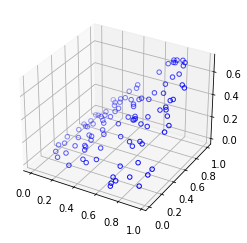

In [16]:
#check that 3D-plot works
x= np.random.random(100)
y= np.random.random(100)
z= np.sin(x*y)
fig= plt.figure()
ax= fig.add_subplot(111, projection= '3d')
ax.scatter(x,y,z,facecolor='none',edgecolor='b')
#ax.set_facecolor((0,0,0,0))

/opt/miniconda3/envs/sfn-workshop/lib/python3.7/site-packages/ipykernel_launcher.py:23: PerformanceWarning: indexing past lexsort depth may impact performance.


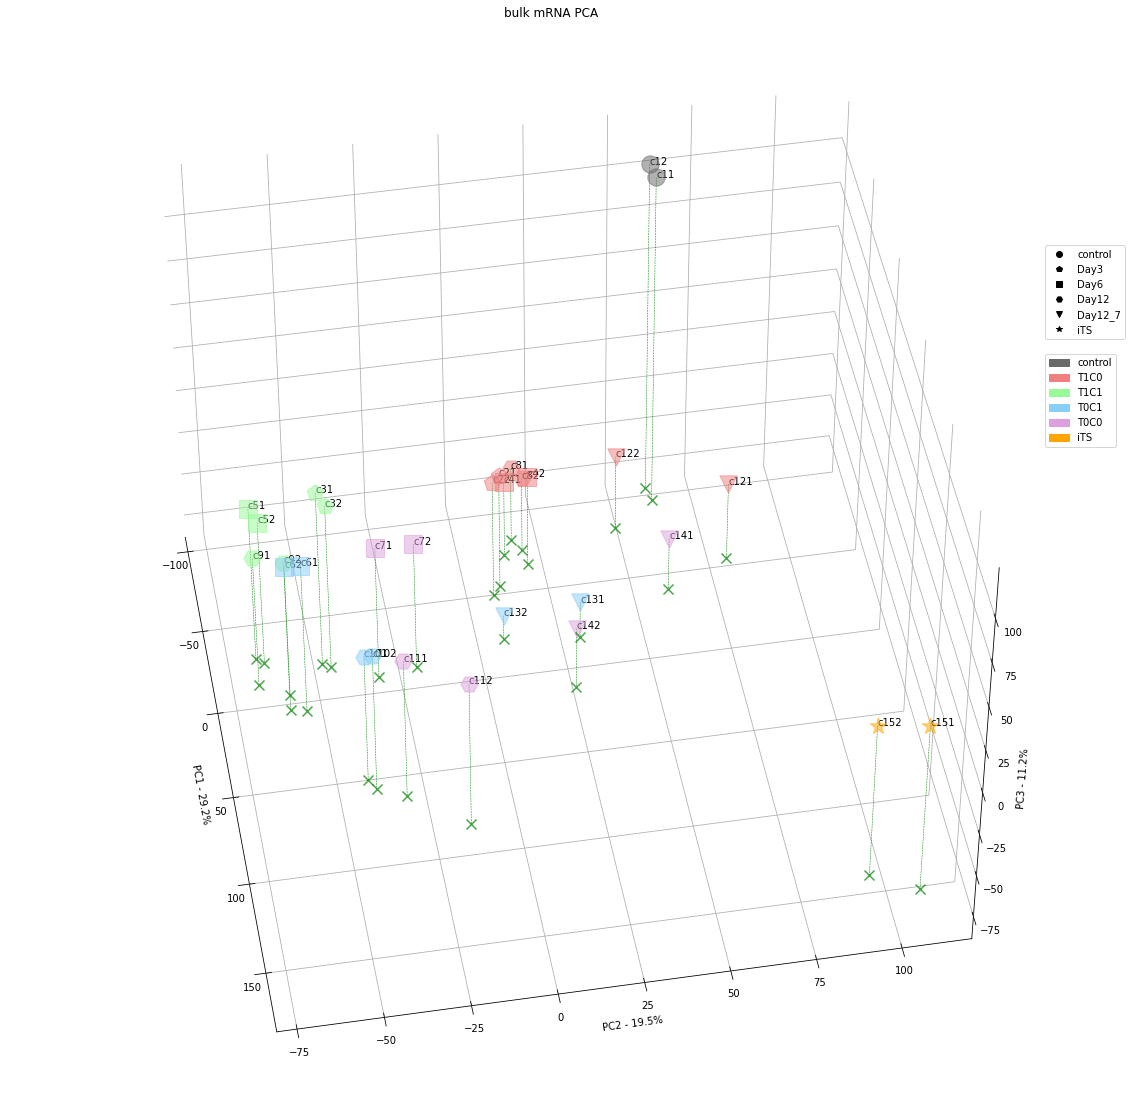

In [17]:
#3D PCA plot
"""
kmeans = KMeans(n_clusters = 5)
X_clustered = kmeans.fit_predict(pca_data)
print(X_clustered)
LABEL_COLOR_MAP = {0:'r', 1: 'g', 2: 'b', 3: 'm', 4: 'y'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]
"""
fig = plt.figure(figsize=(25,20))
ax = fig.add_subplot(111, projection='3d')
ax.grid(True,which='both')
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.set_title('bulk mRNA PCA')
ax.set_xlabel('PC1 - {0}%'.format(per_var[0]))
ax.set_ylabel('PC2 - {0}%'.format(per_var[1]))
ax.set_zlabel('PC3 - {0}%'.format(per_var[2]))

#plotting the data
for key in pca_state_df.index:
    sc = ax.scatter(
        pca_state_df.PC1.loc[key],pca_state_df.PC2.loc[key],pca_state_df.PC3.loc[key],alpha = 0.3,
        marker = markers_map[key[1]],label = key[0],color = state_map[key[0]],depthshade = False,
        s = 300
    )
'''
ax.scatter(pca_state_df.PC1,100,pca_state_df.PC3,color='b',marker = 'x',depthshade = False,s=100,alpha = 0.7)
for i in range(30):
    ax.plot([pca_state_df.PC1.iloc[i],pca_state_df.PC1.iloc[i]],
        [pca_state_df.PC2.iloc[i],100],
        [pca_state_df.PC3.iloc[i],pca_state_df.PC3.iloc[i]],linewidth = 0.5,color = 'b',linestyle = 'dashed',antialiased=True)
'''
ax.scatter(pca_state_df.PC1,pca_state_df.PC2,-75,color='g',marker = 'x',depthshade = False,s=100,alpha = 0.7)
for i in range(30):
    ax.plot([pca_state_df.PC1.iloc[i],pca_state_df.PC1.iloc[i]],
        [pca_state_df.PC2.iloc[i],pca_state_df.PC2.iloc[i]],
        [pca_state_df.PC3.iloc[i],-75],linewidth = 0.5,color = 'g',linestyle = 'dashed',antialiased=True)
'''  
ax.scatter(-100,pca_state_df.PC2,pca_state_df.PC3,color='saddlebrown',marker = 'x',depthshade = False,s=100,alpha = 0.7)
for i in range(30):
    ax.plot([pca_state_df.PC1.iloc[i],-100],
        [pca_state_df.PC2.iloc[i],pca_state_df.PC2.iloc[i]],
        [pca_state_df.PC3.iloc[i],pca_state_df.PC3.iloc[i]],
        linewidth = 0.5,color = 'saddlebrown',linestyle = 'dashed',antialiased=True)
'''
#generate legend on state
patchArr = []
for k in state_map:
    my_patch = mpatches.Patch(color = state_map[k], label = k)
    patchArr.append(my_patch)
leg1 = ax.legend(handles = patchArr,bbox_to_anchor=(0.95, 0.7), loc='upper left')
#generate legend on time
lineArr = []
for k in markers_map:
    my_line = mlines.Line2D([],[],color = 'k', marker = markers_map[k], linestyle='',label = k)
    lineArr.append(my_line)
leg2 = ax.legend(handles=lineArr, bbox_to_anchor=(0.95, 0.8), loc='upper left')
ax.add_artist(leg1)
for l in leg1.get_lines():
    l.set_alpha(0.1)
for l in leg2.get_lines():
    l.set_alpha(0.1)
#add annotation
for i in pca_df.index:
    ax.text(pca_df.PC1.loc[i],pca_df.PC2.loc[i],pca_df.PC3.loc[i],
           '{0}'.format(i), size=10)
plt.savefig("pca3d.svg")
#add legend
for ii in range(0,360,10):
      ax.view_init(elev=45., azim=ii)
      plt.savefig("pca3d_projection%d.svg" % ii)


/opt/miniconda3/envs/sfn-workshop/lib/python3.7/site-packages/ipykernel_launcher.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  import sys


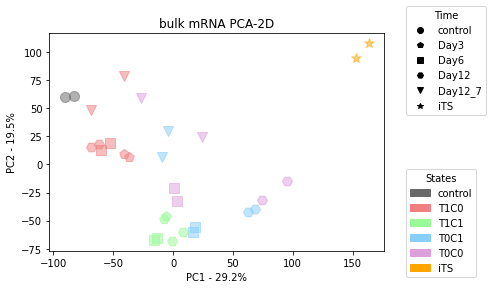

In [18]:
fig,ax = plt.subplots()
ax.set_title('bulk mRNA PCA-2D')
ax.set_xlabel('PC1 - {0}%'.format(per_var[0]))
ax.set_ylabel('PC2 - {0}%'.format(per_var[1]))
for key in pca_state_df.index:
    sc = plt.scatter(
        pca_state_df.PC1.loc[key],pca_state_df.PC2.loc[key],
        color = state_map[key[0]], marker = markers_map[key[1]],alpha = 0.3,label = key[0],
        s = 100
    )
patchArr = []
for k in state_map:
    my_patch = mpatches.Patch(color = state_map[k], label = k)
    patchArr.append(my_patch)
leg1 = ax.legend(handles = patchArr,bbox_to_anchor=(1.05, 0.4), loc='upper left',title="States")

#generate legend on time
lineArr = []
for k in markers_map:
    my_line = mlines.Line2D([],[],color = 'k', marker = markers_map[k], linestyle='',label = k)
    lineArr.append(my_line)
leg2 = ax.legend(handles=lineArr, bbox_to_anchor=(1.05, 0.6), loc='lower left',title='Time')
ax.add_artist(leg1)

plt.savefig("pca2d_01.svg")

/opt/miniconda3/envs/sfn-workshop/lib/python3.7/site-packages/ipykernel_launcher.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  import sys


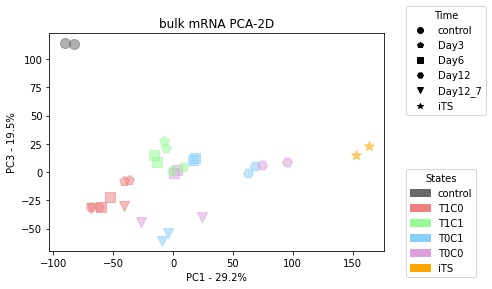

In [19]:
fig,ax = plt.subplots()
ax.set_title('bulk mRNA PCA-2D')
ax.set_xlabel('PC1 - {0}%'.format(per_var[0]))
ax.set_ylabel('PC3 - {0}%'.format(per_var[1]))
for key in pca_state_df.index:
    sc = plt.scatter(
        pca_state_df.PC1.loc[key],pca_state_df.PC3.loc[key],
        color = state_map[key[0]], marker = markers_map[key[1]],alpha = 0.3,label = key[0],
        s = 100
    )
patchArr = []
for k in state_map:
    my_patch = mpatches.Patch(color = state_map[k], label = k)
    patchArr.append(my_patch)
leg1 = ax.legend(handles = patchArr,bbox_to_anchor=(1.05, 0.4), loc='upper left',title="States")

#generate legend on time
lineArr = []
for k in markers_map:
    my_line = mlines.Line2D([],[],color = 'k', marker = markers_map[k], linestyle='',label = k)
    lineArr.append(my_line)
leg2 = ax.legend(handles=lineArr, bbox_to_anchor=(1.05, 0.6), loc='lower left',title='Time')
ax.add_artist(leg1)
plt.savefig("pca2d_02.svg")

In [20]:
#pca_state_df.PC1.loc["T1C1"].array

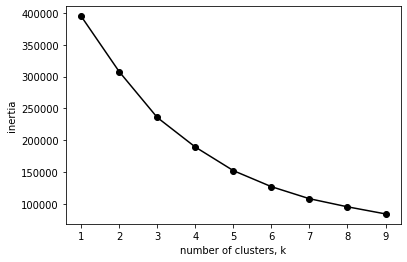

In [21]:
ks = range(1,10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(pca_df.iloc[:,:31])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

[5 5 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 2 2 2 2 1 1 3 3 1 3 4 4]
(6, 30)
[[  0.38879271 -52.33107831]
 [-50.83249519  29.76003922]
 [ 75.2363499  -32.12825457]
 [  3.36660949  20.19252715]
 [158.01708273 101.05082754]
 [-86.73743193  60.65210593]]


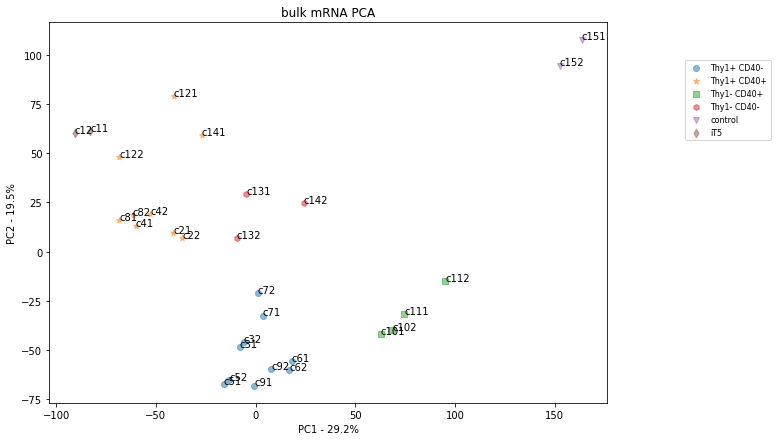

In [22]:
kmeans = KMeans(n_clusters = 6,n_init = 20)
X_clustered = kmeans.fit_predict(pca_data)
print(X_clustered)
print(kmeans.cluster_centers_.shape)
print(kmeans.cluster_centers_[:,0:2])
LABEL_COLOR_MAP = {0:'r', 1: 'g', 2: 'b', 3: 'm', 4: 'y', 5:'k'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]
LABEL_MARKER_MAP = {0:'o',1:'*',2:'s',3:'h',4:'v',5: 'd'}
#assigning legend
#plot PC1 and PC2
#try to plot decision boundary here
'''
for row in kmeans.cluster_centers_[:,0:2]:
    ells = mpl.patches.Ellipse(xy = row, width = 2, height =2, angle = 30 )
    fig, ax = plt.subplots()
    ax.add_patch(ells)
    ax.autoscale()
    plt.show()
    print(1)
'''
plt.figure(figsize = (10,7))
for i in range(6):
    x = pca_df.PC1[X_clustered == i]
    y = pca_df.PC2[X_clustered == i]
    plt.scatter(x,y,marker = LABEL_MARKER_MAP[i],alpha=0.5)
#plt.scatter(pca_df.PC1,pca_df.PC2,c = label_color,alpha=0.5)
#plt.scatter(pca_df.PC1.loc['c3'],pca_df.PC2.loc['c3'],c = 'w',alpha=0.5)
#plt.scatter(pca_df.PC1.loc['c3'],pca_df.PC2.loc['c3'],c = 'k',alpha=0.5)
plt.title('bulk mRNA PCA')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
#add legend
#T1C1 = [c[3],c[6],c[12],c[13]]
#T1C1 = [pca_df.PC1.loc['c4'],pca_df.PC2.loc['c4']]
plt.legend(('Thy1+ CD40-', 'Thy1+ CD40+', 'Thy1- CD40+', 'Thy1- CD40-','control','iT5'),
           scatterpoints=1,
           loc='lower right',
           bbox_to_anchor=(1.3, 0.68),
           ncol=1,
           fontsize=8)
for sample in pca_df.index:
    plt.annotate(sample,(pca_df.PC1.loc[sample],pca_df.PC2.loc[sample]))
plt.show()

No handles with labels found to put in legend.


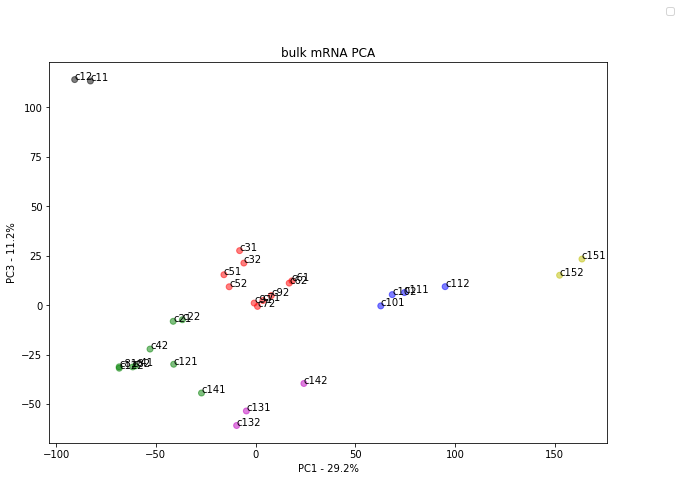

In [23]:
#plot PC1 and PC3
plt.figure(figsize = (10,7))
plt.scatter(pca_df.PC1,pca_df.PC3,c = label_color, alpha=0.5)
plt.title('bulk mRNA PCA')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC3 - {0}%'.format(per_var[2]))
#add the legend
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
for sample in pca_df.index:
    plt.annotate(sample,(pca_df.PC1.loc[sample],pca_df.PC3.loc[sample]))
    
plt.show()